In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [18]:
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.csv', index_col=0)

In [19]:
shape(classII)

(7137, 1018)

In [20]:
mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.all.csv', index_col=0)
thresholded_mutations = list(mutations.sum()[mutations.sum() > 2].index)
print len(thresholded_mutations)
classII_thresh = classII[thresholded_mutations]

667


In [21]:
mutations_thresh = mutations[thresholded_mutations]

In [6]:
yes_mutation, no_mutation = [], []
for mutation in thresholded_mutations:
    yes_mutation.extend(list(classII_thresh[mutations_thresh[mutation].astype(bool)][mutation]))
    no_mutation.extend(list(classII_thresh[~mutations_thresh[mutation].astype(bool)][mutation]))

In [7]:
split_df = pd.DataFrame({'Status': ['Mutation' for x in yes_mutation] + 
                                 ['No Mutation' for x in no_mutation],
                         'PHBR-II': yes_mutation + no_mutation})

In [14]:
len(split_df)

4760379

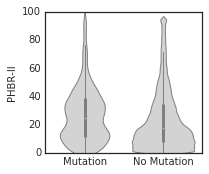

In [15]:
plt.figure(figsize=(3,2.5))
sns.violinplot(x='Status', y='PHBR-II', data=split_df, color='lightgrey')
plt.ylim(0, 100)
plt.xlabel('')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/PHBR-II.mutation_split.pdf')

In [ ]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', index_col=0)
mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', index_col=0)
thresholded_mutations = list(mutations.sum()[mutations.sum() > 2].index)
print len(thresholded_mutations)
classI_thresh = classI[thresholded_mutations]
classII_thresh = classII[thresholded_mutations]
df = pd.DataFrame({'MHC-I': pd.Series(np.matrix(classI_thresh).flatten().tolist()[0]),
                   'MHC-II': pd.Series(np.matrix(classII_thresh).flatten().tolist()[0])})
df['log(MHC-I)'] = np.log10(df['MHC-I'])
df['log(MHC-II)'] = np.log10(df['MHC-II'])

In [13]:
float(mutations.shape[0]*mutations.shape[1]) / mutations.sum().sum()

1089.6706451125547

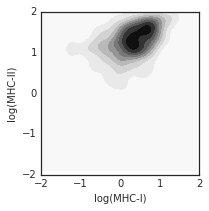

In [5]:
# Panel A
plt.figure(figsize=(3,3))

sample = df.sample(1000).index
g = sns.kdeplot(df.ix[sample]['log(MHC-I)'], df.ix[sample]['log(MHC-II)'],
              cmap="Greys", kind='kde', shade=True, color='lightgrey')
plt.locator_params(nbins=6)
axes = g.axes
axes.set_ylim(-2,2)
axes.set_xlim(-2,2)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/PHBR_density.pdf')

In [5]:
# Panel B - Is in R, not sure if I can import it... 
def create_cluster_script():
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/class_comparison/mutation_probability_heatmap.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -l h_vmem=40G\n")
        out_file.write("#$ -l long")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/class_comparison/mutation_probability_heatmap.R\n")
                       
        out_file.write("date\n")
create_cluster_script()

In [5]:
sum(np.arange(13,26))

247

MHC-II only ORs

In [6]:
all_dfs = []
for category, threshold in zip(['cancer', 'passenger', 'germline'], [2, 0, 0]):
    
    all_dfs.append(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_{0}.{1}.txt'.format(threshold, category),
                      sep=' '))
df = pd.concat(all_dfs)
df['Category'] = ['Driver']*2+['Passenger']*2+['Germline']*2
df.head()
df = df.ix[[0, 2, 4], :]
df.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tables/MHCII_only.OR.csv')

In [7]:
df

,OR,conf_OR_low,conf_OR_high,P,Category
mutation,1.203818,1.177267,1.230968,9.527927e-60,Driver
mutation,1.012530,0.972343,1.054377,5.467523e-01,Passenger
mutation,0.994408,0.992578,0.996242,2.440136e-09,Germline


MHC-I/MHC-II Pan-cancer OR table

In [10]:
all_dfs = []
for category, threshold in zip(['cancer', 'passenger', 'germline'], [2, 0, 0]):
    
    all_dfs.append(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.pan.thresh_{0}.{1}.txt'.format(threshold, category),
                      sep=' '))
df = pd.concat(all_dfs)
df['Category'] = ['Driver']*2+['Passenger']*2+['Germline']*2
df['Variable'] = ['MHC-I', 'MHC-II']*3
df.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tables/Both.OR.csv')

In [11]:
df

,OR,CI_low,CI_high,predicted,Category,Variable
1,1.576946,1.531283,1.623971,x,Driver,MHC-I
2,1.732031,1.664742,1.802039,z,Driver,MHC-II
1,1.003635,0.993421,1.013955,x,Passenger,MHC-I
2,1.029499,1.018213,1.040910,z,Passenger,MHC-II
1,1.064163,1.062454,1.065875,x,Germline,MHC-I
2,0.975104,0.972163,0.978053,z,Germline,MHC-II


MHC-I/MHC-II tissue OR comparison figure

In [17]:
both = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.tissue.thresh_2.cancer.txt',
            sep=' ')
both.head()

,OR,CI_low,CI_high,predicted,tissues
1,1.038989,1.022048,1.056210,x,LUAD
2,1.009793,0.996565,1.023196,x,HNSC
3,0.984953,0.977774,0.992184,x,LGG
4,1.109383,1.064666,1.155978,x,PRAD
5,1.151122,1.140591,1.161750,x,THCA


In [29]:
restricted_tissues = ['GBM', 'OV', 'LUAD', 'LUSC', 'PRAD', 'UCEC','BLCA', 'PAAD', 
                      'LIHC', 'BRCA', 'COAD', 'STAD', 'SKCM', 'THCA', 'HNSC', 'READ',
                      'LGG', 'UCS']
both = both[both.tissues.isin(restricted_tissues)]

In [30]:
both['OR_log'] = np.log2(both.OR)

In [31]:
# Gotta restrict this plot to those with enough mutations

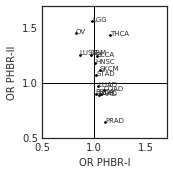

In [38]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
#plt.figure(figsize=(3, 3))
plt.scatter(both[both.predicted == 'x'].OR,
            both[both.predicted == 'z'].OR, c='k', s=3)
for i, txt in enumerate(both[both.predicted == 'x'].tissues):
    ax.annotate(txt, (list(both[both.predicted == 'x'].OR)[i], 
                      list(both[both.predicted == 'z'].OR)[i]), size=7)
plt.xlabel('OR PHBR-I')
plt.ylabel('OR PHBR-II')
plt.axhline(1, c='k')
plt.axvline(1, c='k')
plt.locator_params(nbins=6)
plt.xlim(0.5,1.7)
plt.ylim(0.5,1.7)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/OR.class_comparison.tissue.pdf')

In [ ]:
# script that creates this analysis is "predictions"

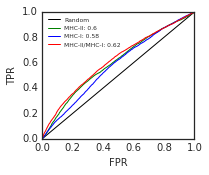

In [3]:
# Panel ??
sns.set_style("white")
fig = plt.figure(figsize=(3, 2.5))

modelI, modelII, modelboth = [2, 2, 2]
threshold = 2
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_i.model_{0}.{1}.10.data.txt'.format(modelI, 
                                                                                                                       threshold),
                 sep=' ').dropna()
precision_I, recall_I, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_I, tpr_I, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_I = metrics.roc_auc_score(df.label, df.predicted_prob)
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_ii.model_{0}.{1}.10.data.txt'.format(modelII, 
                                                                                                                        threshold), 
                 sep=' ').dropna()
precision_II, recall_II, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_II, tpr_II, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_II = metrics.roc_auc_score(df.label, df.predicted_prob)
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.both_classes.model_{0}.{1}.10.data.txt'.format(modelboth,
                                                                                                                              threshold),
                 sep=' ').dropna()
precision_both, recall_both, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_both, tpr_both, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_both = metrics.roc_auc_score(df.label, df.predicted_prob)
sns.set_style("white")
plt.plot([0,1], [0, 1], c='k', label='Random')
plt.plot(fpr_II, tpr_II, c='g', label='MHC-II: {0}'.format(round(score_II, 2)))
plt.plot(fpr_I, tpr_I, c='b', label='MHC-I: {0}'.format(round(score_I, 2)))
plt.plot(fpr_both, tpr_both, c='r', label='MHC-II/MHC-I: {0}'.format(round(score_both, 2)))
plt.legend(loc=2, prop={'size': 6})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/Pan_AUC.pdf')

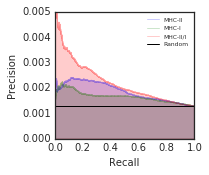

In [6]:
fig = plt.figure(figsize=(3, 2.5))
for cat, col, model in zip(['mhc_ii', 'mhc_i', 'both_classes'], ['b', 'g', 'r'], [2, 2, 2]):
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.{0}.model_{1}.2.10.data.txt'.format(cat,model),
                           sep=' ')
    df = df.dropna()
    precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)
    random = float(len(df[df.label == 1]))/len(df)
    plt.step(recall, precision, color=col, alpha=0.2,
                 where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color=col)
    
plt.axhline(random, c='k')
plt.legend(('MHC-II', 'MHC-I', 'MHC-II/I', 'Random',), loc=1, prop={'size': 6})
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.005])
plt.xlim([0.0, 1.0])
plt.tight_layout()

plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/Pan_PR.png')

F1 scores

In [ ]:
categories, models, F1s, AUCs = [], [], [], []
for category in ['mhc_i', 'mhc_ii', 'both_classes']:
    print category
    for model in [0, 1, 2, 3]:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.{0}.model_{1}.2.10.data.txt'.format(category,
                                                                                                                          model),
                               sep=' ')
        df = df.dropna()
        mean = df.label.mean()
        def threshold(x):
            if x < mean:
                return 0
            else:
                return 1
        df['predicted_label'] = df.predicted_prob.apply(threshold)
        categories.append(category)
        models.append(model)
        
        F1s.append(metrics.f1_score(df.label, df.predicted_label))
        AUCs.append(metrics.roc_auc_score(df.label, df.predicted_prob))
        print "Model: ", model

In [ ]:
results = pd.DataFrame({'Category': ['MHC-I']*4 + ['MHC-II']*4 + ['Both Classes']*4,
              'Model': ['0', '1', '2', '3']*3,
              'F1 Score': F1s,
              'AUC': AUCs})

In [ ]:
results.sort_values('AUC', ascending=False)

In [ ]:
results.sort_values('F1 Score', ascending=False)

In [27]:
results.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/model_selection.csv')

In [7]:
results = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/model_selection.csv',
                     index_col=0)

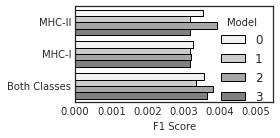

In [8]:
plt.figure(figsize=(4, 2))
sns.barplot(y='Category', x='F1 Score', hue='Model', data=results, color='grey',
           order=['MHC-II', 'MHC-I', 'Both Classes'])
plt.xlim(0, 0.0055)
plt.ylabel(' ')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/model_selection.F1.pdf')

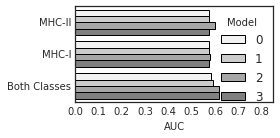

In [9]:
plt.figure(figsize=(4, 2))

sns.barplot(y='Category', x='AUC', hue='Model', data=results, color='grey',
           order=['MHC-II', 'MHC-I', 'Both Classes'])
plt.xlim(0, 0.85)
plt.ylabel(' ')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/model_selection.AUC.pdf')

In [22]:
tissue_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_tissues.csv', 
                        index_col=0)
tissues_with_mutations = []
for tissue in tissue_df.Tissue.unique():
    if mutations.ix[list(tissue_df[tissue_df.Tissue == tissue].index)].sum().sum() > 50:
        tissues_with_mutations.append(tissue)

In [25]:
tissues_with_mutations

['GBM',
 'OV',
 'LUAD',
 'LUSC',
 'PRAD',
 'UCEC',
 'BLCA',
 'PAAD',
 'LIHC',
 'BRCA',
 'COAD',
 'STAD',
 'SKCM',
 'THCA',
 'HNSC',
 'READ',
 'LGG',
 'UCS']

In [26]:
len(tissues_with_mutations)

18

In [27]:
# Panel E - Tissue specific precision-recall
tissues_over_100 = list(tissue_df.Tissue.value_counts()[tissue_df.Tissue.value_counts() > 100].index)
all_f1, all_auc, tissues_used = [], [], []
for tissue in tissues_with_mutations:
    
    print tissue
    tissue_f1, tissue_auc = [], []
    for model in ['MHC_I', 'MHC_II', 'Both']:
        try:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tissues/predictions.muts_in_{0}.{1}.2.data.txt'.format(tissue, model),
                       sep=' ').dropna()
            def threshold(x):
                if x < df.label.mean():
                    return 0
                else:
                    return 1
            df['predicted_label'] = df.predicted_prob.apply(threshold)
            tissue_f1.append(metrics.f1_score(df.label, df.predicted_label))
            tissue_auc.append(metrics.roc_auc_score(df.label, df.predicted_prob))
        except:
            None
    if len(tissue_f1) == 3:
        tissues_used.append(tissue)
        all_f1.append(tissue_f1)
        all_auc.append(tissue_auc)
f1_df = pd.DataFrame(all_f1)
f1_df.columns = ['MHC_I', 'MHC_II', 'Both']
f1_df.index = tissues_used

auc_df = pd.DataFrame(all_auc)
auc_df.columns = ['MHC_I', 'MHC_II', 'Both']
auc_df.index = tissues_used

GBM
OV
LUAD
LUSC
PRAD
UCEC
BLCA
PAAD
LIHC
BRCA
COAD
STAD
SKCM
THCA
HNSC
READ
LGG
UCS


In [9]:
f1_df.sort_values('Both', 
                  ascending=False).to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/tissue.F1.csv')

In [ ]:
f1_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/tissue.F1.csv',
                    index_col=0)

In [11]:
f1_df.head()

,MHC_I,MHC_II,Both
THCA,0.267117,0.210172,0.252485
PAAD,0.113854,0.146426,0.153753
UCS,0.088068,0.073733,0.082067
LGG,0.060447,0.073761,0.077993
READ,0.089888,0.076687,0.077042


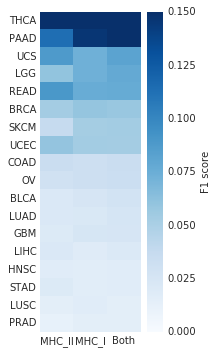

In [12]:
plt.figure(figsize=(3, 5))
cm = sns.heatmap(f1_df.sort_values('Both', ascending=False), 
                 xticklabels=['MHC_II', 'MHC_I', 'Both'], 
                 yticklabels=f1_df.sort_values('Both', ascending=False).index,
                 cmap='Blues', vmin=0.0, vmax=0.15,
                 cbar_kws={'label': 'F1 score'})
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/F1_tissues.heatmap.pdf')

In [28]:
auc_df.sort_values('Both', 
                  ascending=False).to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/tissue.AUC.csv')

In [29]:
auc_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/tissue.AUC.csv',
                    index_col=0)

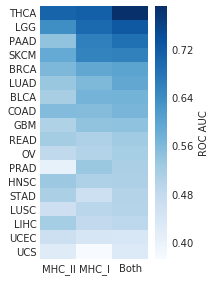

In [31]:
plt.figure(figsize=(3, 4))
cm = sns.heatmap(auc_df.sort_values('Both', ascending=False), 
                 xticklabels=['MHC_II', 'MHC_I', 'Both'], 
                 yticklabels=auc_df.sort_values('Both', ascending=False).index,
                 cmap='Blues', #vmin=0.0, #vmax=0.15,
                 cbar_kws={'label': 'ROC AUC'})
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/AUC_tissues.heatmap.pdf')

In [19]:
f1_df.sort_values('Both', ascending=False).head()

,MHC_I,MHC_II,Both
THCA,0.263114,0.210064,0.259740
PAAD,0.110448,0.144208,0.154683
LAML,0.074478,0.074205,0.085747
PCPG,0.126126,0.303030,0.084507
LGG,0.061013,0.072409,0.078388
